## Exercises for lesson 5
Quite a high fixed cost for learning this.

In [1]:
using StaticArrays

So there are a few kinds of type in Julia:
- Literals
    - `Int64`
    - `Float64`
- Parametric
    - `Array`
    - `Complex`
    - `Tuple`
    - `NamedTuple`
    - `AbstractArray`

There is also a type hierarchy
- `Abstract` vs `Concrete`
    - `Concrete` types are types like `Int64` or `Float64`
    - `Abstract` types are:

      Abstract types cannot be instantiated, and serve only as nodes in the type graph, thereby describing sets of related concrete types: those concrete types which are their descendants

There are subtypes and supertypes. It's easy top think of these like a family. For example, `Float64` and `Int64` are both subtypes of the `Real`. That is like `Real` is a parent and `Float64` and `Int64` are its children. Another way, `Real` is a supertype of `Float64` and `Int64`.

In [4]:
@show Float64 <: Real
@show Real <: Float64;

Float64 <: Real = true
Real <: Float64 = false


You can get like a full family tree by using `show_supertypes`

In [6]:
using Base: show_supertypes
@show show_supertypes(Float64)

Float64 <: AbstractFloat <: Real <: Number <: Anyshow_supertypes(Float64) = nothing


Similarly

In [7]:
@show subtypes(Real)

subtypes(Real) = Any[AbstractFloat, AbstractIrrational, Integer, Rational]


4-element Vector{Any}:
 AbstractFloat
 AbstractIrrational
 Integer
 Rational

### Exercise 1:

Explore the package [StaticArrays.jl](https://github.com/JuliaArrays/StaticArrays.jl).

- Describe two abstract types and the hierarchy of three different concrete types.  
- Benchmark the calculation of some simple linear algebra with a static array
  compared to the following for a dense array for `N = 3` and `N = 15`.  

One abstract type is `Array` and another is `Tuple`.

My three concrete types are:
- `Int64`
- `Float64`
- `Number` 

In [9]:
@show show_supertypes(Int64);

Int64 <: Signed <: Integer <: Real <: Number <: Anyshow_supertypes(Int64) = nothing


In [10]:
@show show_supertypes(Float64);

Float64 <: AbstractFloat <: Real <: Number <: Anyshow_supertypes(Float64) = nothing


In [11]:
@show show_supertypes(Number)

Number <: Anyshow_supertypes(Number) = nothing


In [12]:
@show Number <: Any

Number <: Any = true


true

In [15]:
using BenchmarkTools

In [22]:
N = 15
A = rand(N,N)
X = rand(N)

@btime $A * $X
@btime inv($A);

  85.877 ns (1 allocation: 176 bytes)
  2.913 μs (4 allocations: 9.78 KiB)


## Exercise 2


In [29]:
using LinearAlgebra, BenchmarkTools, StaticArrays
Sigma = [0.4 0.3;
        0.3 0.45]

G = I
R = 0.5 * Sigma

gain(Sigma, G, R) = Sigma * G' * inv(G * Sigma * G' + R)

@btime gain($Sigma, $G, $R)

  471.429 ns (9 allocations: 1.77 KiB)


2×2 Matrix{Float64}:
 0.666667     1.11022e-16
 1.11022e-16  0.666667

In [38]:
using LinearAlgebra, BenchmarkTools, StaticArrays
Sigma = @SMatrix [0.4 0.3; 0.3 0.45]

G = SMatrix{2,2}(1I)
R =  SMatrix{2,2}(0.5 * Sigma)

gain(Sigma, G, R) = Sigma * G' * inv(G * Sigma * G' + R)

@btime gain($Sigma, $G, $R)

  27.108 ns (0 allocations: 0 bytes)


2×2 SMatrix{2, 2, Float64, 4} with indices SOneTo(2)×SOneTo(2):
 0.666667     1.22536e-16
 1.75169e-16  0.666667

## Exercise 3

In [53]:
using Polynomials

p = Polynomial([2, -5, 2], :x)
@show p
p_dash = derivative(p)
@show p(0.1), p_dash(0.1)
@show roots(p);

p = Polynomial(2 - 5*x + 2*x^2)
(p(0.1), p_dash(0.1)) = (1.52, -4.6)
roots(p) = [0.5, 2.0]


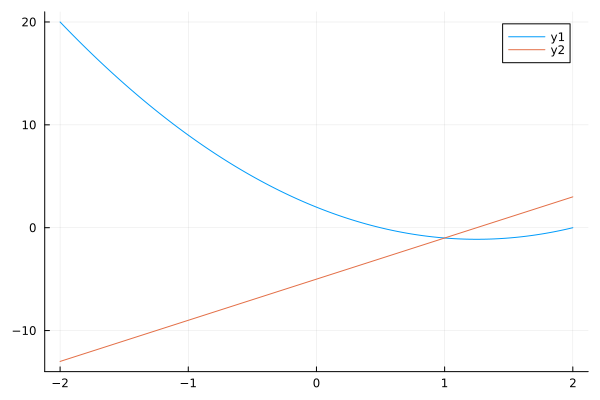

In [61]:
using Plots
x = range(start = -2, step = 0.01, stop = 2)
p.(x)
plot(x, p.(x))
plot!(x,p_dash.(x))